## <span style='color:lightgreen;'>The Power-Law (Gamma) Transformation</span>  
Power-Law (Gamma) Transformation เป็นวิธีการยอดนิยมในการประมวลผลภาพ (image enhancement) โดยเฉพาะสำหรับปรับความสว่างและคอนทราสต์ของภาพ วิธีนี้มีประสิทธิภาพสูง โดยเฉพาะเมื่อจัดการกับภาพที่มืดเกินไปหรือสว่างเกินไป หรือเมื่อต้องการปรับคอนทราสต์เพื่อให้ภาพดูดีขึ้น

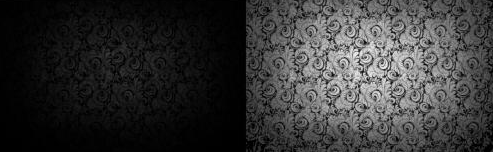

Here's a brief explanation of how it works:

1. **<i><span style='color:lightblue;'> Power-Law Transformation Function:</span> </i>** The core of this method is the power-law transformation function, which is defined as  **<i><span style='color:lightblue;'> s=c⋅(r^γ)</span> </i>** ,  where: **<i>s</i>** is the output pixel value. **<i>r</i>** is the input pixel value. **<i>c</i>** and **<i>γ</i>** are positive constants.
   - **s** = ค่าพิกเซลผลลัพธ์ (output pixel value)
   - **r** = ค่าพิกเซลต้นฉบับ (input pixel value) ที่ normalize เป็น [0,1]
   - **c** = ค่าคงที่สำหรับปรับสเกล (มักจะ = 1 หรือ 255)
   - **γ (gamma)** = ค่าคงที่ที่ควบคุมลักษณะการแปลงค่า

2. **<i><span style='color:lightblue;'>ผลของ gamma (γ) ต่อภาพ:</span> </i>**
    - when **<i><span style='color:lightgreen;'> γ < 1</span> </i>**, ทำให้ภาพสว่างขึ้น (boost ค่าต่ำ) — เหมาะสำหรับภาพมืด
    - **<i><span style='color:lightgreen;'> γ = 1</span> </i>**, คือ ไม่มีการเปลี่ยนแปลง เส้นตรง Linear 

    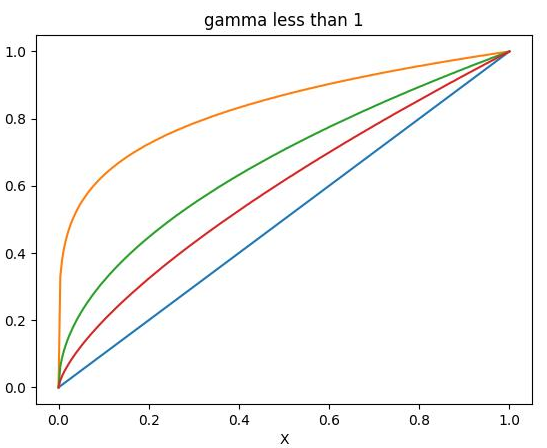
    
    - When  **<i><span style='color:green;'> γ>1</span> </i>**, ทำให้ภาพมืดลง (compress ค่าสูง) — เหมาะสำหรับภาพสว่างเกิน

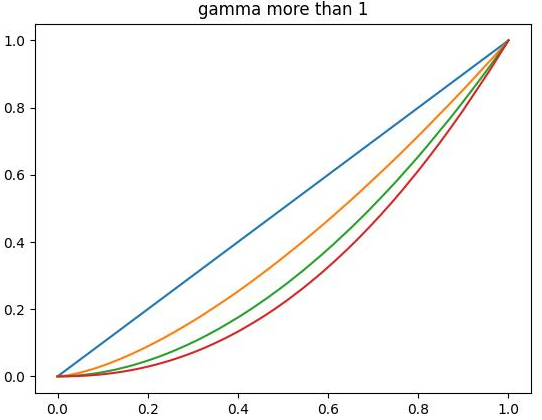

3. **<i><span style='color:lightblue;'>The constant  c</span> </i>** is often chosen to scale the maximum output value to the desired range, such as 255 for an 8-bit grayscale image.
- มักเลือกเพื่อปรับค่าสูงสุดของผลลัพธ์ให้เหมาะสม เช่น 255 สำหรับภาพ 8-bit grayscale

4. **<i><span style='color:lightblue;'>Application:</span> </i>**  This transformation is applied to each pixel in the image. For color images, it can be applied to each color channel independently.

5. **<i><span style='color:lightblue;'>Enhancement Effects:</span> </i>** Preprocessing images for computer vision tasks where contrast normalization is required. The Power-Law (Gamma) Transformation is a simple yet powerful tool in image processing, and it's widely used due to its effectiveness and ease of implementation.

## <span style='color:lightblue;'>Let's start</span>  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## <span style='color:lightblue;'>READ RAW IMAGE AND NORMALIZATION</span>  
<b><span style='color:orange;'>The image normalization</span></b>  is required

In [ ]:
gamma = 0.5
c = 255.0
img = cv2.imread("./images/dark2.png", cv2.IMREAD_GRAYSCALE)
img_norm = img.astype(np.float16)
img_norm = img_norm/np.amax(img_norm)# img_norm.max() ความหมายเหมือนกัน 
# เอามาหารเพื่อให้เป็นค่าระหว่าง 0-1 เป็นการ normalize 


In [3]:
cv2.imshow("test image", img)
cv2.waitKey()
cv2.destroyAllWindows()

## <span style='color:lightgreen;'>Method I of The Power-Law (Gamma) Transformation</span> 
##### วิธีที่ 1 เขียนบรรทัดเดียว (vector)

In [4]:
gamma_img = (img_norm**gamma)*c
gamma_img = gamma_img.astype(np.uint8) 

In [21]:
muls_img = cv2.hconcat([img, gamma_img])
cv2.imwrite('./outs/img2s.png', muls_img.astype(np.uint8))



True

In [33]:
cv2.imshow("test image", muls_img)
cv2.waitKey()
cv2.destroyAllWindows()

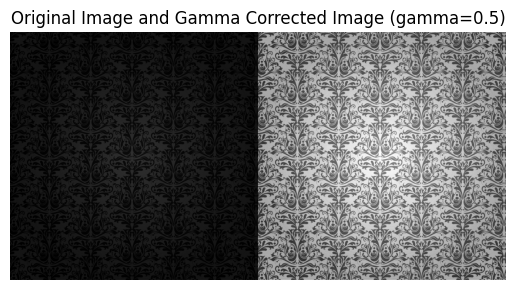

In [34]:
plt.imshow(muls_img, cmap='gray') 
plt.axis('off')
plt.title('Original Image and Gamma Corrected Image (gamma=0.5)')
plt.savefig('./outs/testsavefig.png') # บันทึกภาพเป็นไฟล์ที่แคปรูปจากตารางทั้งหมดมา
plt.show()

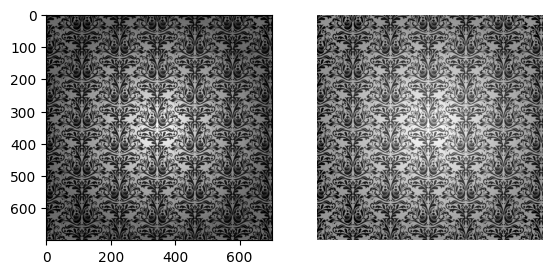

In [7]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
#plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(gamma_img, cmap='gray')
plt.axis('off')

plt.show()
#plt.savefig('./outs/fig_gamma.png')

## <span style='color:orange;'>Method II of The Power-Law (Gamma) Transformation</span>

##### วิธีที่ 2 วนทีละจุด แต่มันช้ามากกกกกกกก (loop)

In [8]:
print(img_norm.shape)# rows, cols

(700, 700)


In [9]:
gam_img = np.zeros_like(img_norm, dtype='float') 
# np.zeros_like() สร้าง array ที่มีค่าเป็น 0 โดยมีขนาดเท่า img_norm dimension
# np.zeros(row,col) สร้าง array ที่มีค่าเป็น 0 โดยกำหนด row, col เอง
row, col = gam_img.shape
print(row,col)

700 700


In [10]:
for i in range(row):
    for j in range(col):
        gam_img[i,j] = c*(img_norm[i,j]**gamma)

gam_img = gam_img.astype(np.uint8) 

##### แสดงภาพ 2 ภาพในกราฟิกเดียวกัน

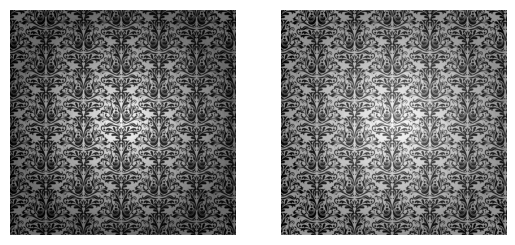

In [ ]:
fig = plt.figure() # สร้าง figure เปล่าๆ ขึ้นมา
fig.add_subplot(1, 2, 1) # 1 แถว 2 คอลัมน์ ตำแหน่งที่ 1
plt.imshow(img, cmap='gray') # แสดงภาพต้นฉบับ

fig.add_subplot(1, 2, 2) # 1 แถว 2 คอลัมน์ ตำแหน่งที่ 2
plt.imshow(gam_img, cmap='gray') # แสดงภาพที่ผ่านการแก้ไขด้วย gamma
plt.axis('off')

plt.show()

## <span style='color:lightblue;'>Method III of The Power-Law (Gamma) Transformation</span> 

##### วิธ๊ที่ 3 เหมือนวิธีที่ 2 แต่เร็วกว่าเยอะะะะะ (LUT = Look-Up Table (ตารางค้นหา))
สรุป:
cv2.LUT คือการสร้างตารางค้นหา (0-255 → output) แล้วใช้กับทุกพิกเซล — เร็วสุดสำหรับ batch processing และ ง่ายต่อการเข้าใจเชิงแนวคิด (map ค่าเดิมไป ค่าใหม่)

ตัวอย่างการทำงาน:
```py
ภาพต้นฉบับ (img)
    ↓
อ่านค่าพิกเซล: 50, 100, 150, 200
    ↓
ค้นหาในตาราง: gam_table[50], gam_table[100], gam_table[150], gam_table[200]
    ↓
ได้ค่าใหม่: 113, 160, 196, 226
    ↓
ภาพที่ปรับค่าแล้ว (gam_img2)
```

In [12]:
k = np.amax(img)
print(k)

50


##### เป็นลำดับการทำงานของ `table = np.array([ i/255.0 for i in range(256)])`

In [38]:
x = range(256)
y =[]
for i in x:
    y.append(i/255.0)
z = np.array(y)
print(z)

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

In [13]:
table = np.array([ i/255.0 for i in range(256)]) # สร้างตารางค่าความสว่าง 0-1 เป็น normalized แล้ว
gam_table = c*(table**gamma)
gam_table = gam_table.astype(np.uint8)
print(gam_table)

[  0  15  22  27  31  35  39  42  45  47  50  52  55  57  59  61  63  65
  67  69  71  73  74  76  78  79  81  82  84  85  87  88  90  91  93  94
  95  97  98  99 100 102 103 104 105 107 108 109 110 111 112 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 141 142 143 144 145 146 147 148 148 149 150
 151 152 153 153 154 155 156 157 158 158 159 160 161 162 162 163 164 165
 165 166 167 168 168 169 170 171 171 172 173 174 174 175 176 177 177 178
 179 179 180 181 182 182 183 184 184 185 186 186 187 188 188 189 190 190
 191 192 192 193 194 194 195 196 196 197 198 198 199 200 200 201 201 202
 203 203 204 205 205 206 206 207 208 208 209 210 210 211 211 212 213 213
 214 214 215 216 216 217 217 218 218 219 220 220 221 221 222 222 223 224
 224 225 225 226 226 227 228 228 229 229 230 230 231 231 232 233 233 234
 234 235 235 236 236 237 237 238 238 239 240 240 241 241 242 242 243 243
 244 244 245 245 246 246 247 247 248 248 249 249 25

##### เป็นลำดับการทำงานของ `gam_img2 = cv2.LUT(img, gam_table)`
สรุป:
- ภาพเดิม = ภาพที่อ่านมาจากไฟล์ (img) ค่าแต่ละพิกเซล 0-255
- แปลง = ใช้ตารางแปลงค่า (gam_table) กับทุกพิกเซล
- ผลลัพธ์ = ภาพใหม่ (out หรือ gam_img2) ที่มีค่าความสว่างปรับแล้ว

In [ ]:
# เป็นฟังก์ชั่นที่ใช้ค้นหาในตาราง แล้วใช้ตารางแปลงค่า เพื่อแปลงภาพต้นฉบับเป็นภาพใหม่ 
out = np.zeros_like(img, dtype='uint8') 
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        inten = img[i,j] # อ่าน intensity ของ pixel ที่ตำแหน่ง (i,j)
        x = gam_table[inten] # หา intensity จากตารางแปลงค่า
        out[i,j] = x # กำหนดค่านั้นให้ pixel ที่ตำแหน่ง (i,j)

In [ ]:
gam_img2 = cv2.LUT(img, gam_table) # ใช้ตารางแปลงค่าความสว่างที่สร้างขึ้นมาแปลงภาพเดิม

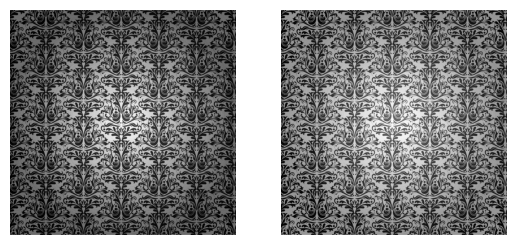

In [15]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(gam_img2, cmap='gray')
plt.axis('off')

plt.show()

ข้อควรระวัง

⚠ ไม่ควร normalize ด้วย 255.0 ตรง ๆ ให้ใช้ np.amax(img) เพื่อปรับตามค่าจริง

⚠ ป้องกันการหารศูนย์: ใช้ eps เช่น (max + 1e-8)

⚠ ไม่ควรคำนวณ power บน uint8 โดยตรง ต้องแปลงเป็น float ก่อน

⚠ ระวัง over-enhancement: อาจเพิ่ม noise หรือ artifact